In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
#libraries
import pandas as pd

import numpy as np
import gzip

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# lib Datetime
from datetime import datetime
# lib for text preprocessing
import spacy
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import contractions
import unicodedata
tokenizer = ToktokTokenizer()
nlp = spacy.load("en_core_web_sm")
from sklearn.feature_extraction.text import CountVectorizer

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\STSC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df = pd.read_csv('/users/STSC/Desktop/datacleaned6.csv')

In [4]:
df.head(5)

,reviewer_id,product_id,reviewer_name,rating,unix_review_time,categories,review_text,pos_feedback,neg_feedback,rating_class,help_prop,review_time,clean_text
0,A30TL5EWN6DFXT,120401325X,christina,4,1400630400,['Cell Phones & Accessories'],Looks Good They look good and stick good! I ju...,0,0,good,0.000000,2014-05-21,look good look good stick good like rounded sh...
1,ASY55RVNIL0UD,120401325X,emily l.,5,1389657600,['Cell Phones & Accessories'],Really great product. These stickers work like...,0,0,good,0.000000,2014-01-14,great product sticker work like review say sti...
2,A2TMXE2AFO7ONB,120401325X,Erica,5,1403740800,['Cell Phones & Accessories'],LOVE LOVE LOVE These are awesome and make my p...,0,0,good,0.000000,2014-06-26,love love love awesome phone look stylish far ...
3,AWJ0WZQYMYFQ4,120401325X,JM,4,1382313600,['Cell Phones & Accessories'],Cute! Item arrived in great time and was in pe...,4,0,good,1.000000,2013-10-21,cute item arrive great time perfect condition ...
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,5,1359849600,['Cell Phones & Accessories'],leopard home button sticker for iphone 4s awes...,2,1,good,0.666667,2013-02-03,leopard home button sticker iphone awesome sta...


In [5]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas_profiling

In [ ]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

# bar  plot between  products and rating


In [11]:
#f, ax = plt.plot(1,2, figsize=(12,8))

    
#ax.bar(x='product_id',y='rating',color="blue")
#plt.show()

multi bar plot between helpful and based on average positive,neg feedback

In [ ]:
#ax1=df.plot(x='rating', y='help_prop', kind="bar",figsize=(8,4), color='blue')


# correlation plot

<AxesSubplot:>

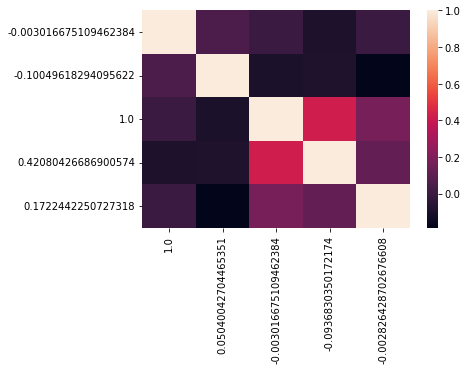

In [5]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.rating.values,
            yticklabels=corr.pos_feedback.values)




# Count of top most products

In [6]:
products = df["product_id"].unique()
products

array(['120401325X', '3998899561', '6073894996', ..., 'B00LH1R5HW',
       'B00LH1R6SK', 'B00LORXVUE'], dtype=object)

# Get counts per product and rating

In [7]:
reviews_per_rating = df[['product_id', 'rating']].value_counts()
reviews_per_rating

product_id  rating
B005SUHPO6  5         545
B009RXU59C  5         494
B000S5Q9CA  5         464
B008OHNZI0  5         454
B0042FV2SI  5         377
                     ... 
B0093A5V98  2           1
B0093BAJ62  2           1
B0093BJU5S  3           1
B003REC0XG  1           1
120401325X  3           1
Length: 36441, dtype: int64

In [8]:
top_products = (reviews_per_rating >= 10).groupby('product_id').all()
top_products

product_id
120401325X    False
3998899561    False
6073894996    False
7532385086    False
7887421268    False
              ...  
B00LH1QZR8    False
B00LH1R3C4    False
B00LH1R5HW    False
B00LH1R6SK    False
B00LORXVUE    False
Length: 10420, dtype: bool

In [9]:
apple_fplot = df.groupby(['unix_review_time'])['rating'].mean()
apple_fplot

unix_review_time
982800000     5.000000
1033689600    5.000000
1070668800    5.000000
1072051200    5.000000
1073520000    5.000000
                ...   
1405728000    4.296703
1405814400    4.222222
1405900800    4.210526
1405987200    4.293478
1406073600    3.866667
Name: rating, Length: 2829, dtype: float64

In [10]:
from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

ListWords = []
for m in df['review_text']:
    n = RegExpTokenizer(str(m))
    ListWords.append(n)
print(ListWords[10])

['Just', 'what', 'I', 'needed', 'this', 'case', 'fits', 'perfectly', 'on', 'the', 's4', 'and', 'keeps', 'me', 'powerd', 'all', 'day', 'I', 'can', 't', 'complain', 'a', 'recommend', 'it', 'to', 'all']


In [11]:
#All Words
from nltk import FreqDist
def Bag_Of_Words(ListWords):
    all_words = []
    for m in ListWords:
        for w in m:
            all_words.append(w.lower())
    all_words1 = FreqDist(all_words)
    return all_words1

In [ ]:
#print(freq_dist)

In [ ]:
#from nltk.probability import FreqDist
#freq_dist = FreqDist(all_words)
#print(freq_dist)
#freq_dist.most_common(3)

Combien de Mots !!! 88531


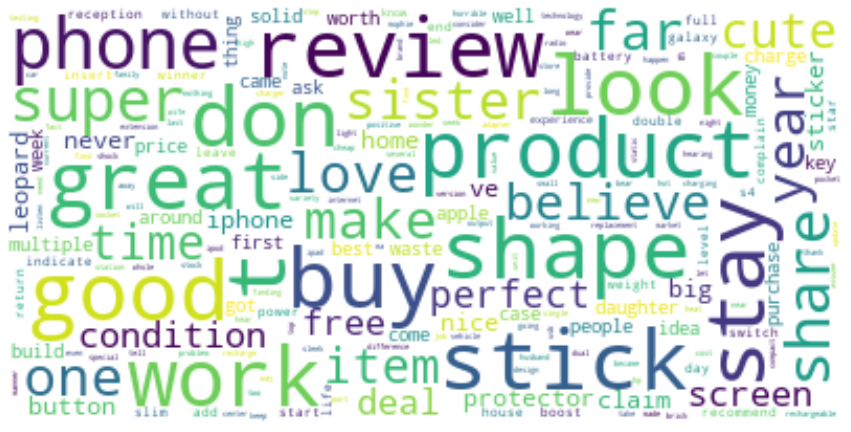

In [12]:
import matplotlib as mpl
from wordcloud import WordCloud
all_words4 = Bag_Of_Words(ListWords)
ax = plt.figure(figsize=(15,10))
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',max_font_size=40).generate(' '.join(all_words4.keys()))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
print("Combien de Mots !!!",len(all_words4))

<AxesSubplot:>

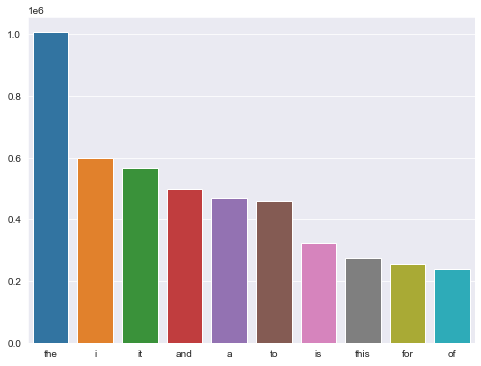

In [13]:
plt.figure(figsize = (8,6))
import seaborn as sns
from sklearn.manifold import TSNE
all_words4 = Bag_Of_Words(ListWords)
count = []
Words  = []
for w in all_words4.most_common(10):
    count.append(w[1])
    Words.append(w[0])
sns.set_style("darkgrid")
sns.barplot(Words,count)

In [14]:
df

,reviewer_id,product_id,reviewer_name,rating,unix_review_time,categories,review_text,pos_feedback,neg_feedback,rating_class,help_prop,review_time,clean_text
0,A30TL5EWN6DFXT,120401325X,christina,4,1400630400,['Cell Phones & Accessories'],Looks Good They look good and stick good! I ju...,0,0,good,0.000000,2014-05-21,look good look good stick good like rounded sh...
1,ASY55RVNIL0UD,120401325X,emily l.,5,1389657600,['Cell Phones & Accessories'],Really great product. These stickers work like...,0,0,good,0.000000,2014-01-14,great product sticker work like review say sti...
2,A2TMXE2AFO7ONB,120401325X,Erica,5,1403740800,['Cell Phones & Accessories'],LOVE LOVE LOVE These are awesome and make my p...,0,0,good,0.000000,2014-06-26,love love love awesome phone look stylish far ...
3,AWJ0WZQYMYFQ4,120401325X,JM,4,1382313600,['Cell Phones & Accessories'],Cute! Item arrived in great time and was in pe...,4,0,good,1.000000,2013-10-21,cute item arrive great time perfect condition ...
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,5,1359849600,['Cell Phones & Accessories'],leopard home button sticker for iphone 4s awes...,2,1,good,0.666667,2013-02-03,leopard home button sticker iphone awesome sta...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190991,A1YMNTFLNDYQ1F,B00LORXVUE,eyeused2loveher,5,1405900800,['Cell Phones & Accessories'],This works just perfect! Works great just like...,0,0,good,0.000000,2014-07-21,work perfect work great like original need ext...
190992,A15TX8B2L8B20S,B00LORXVUE,Jon Davidson,5,1405900800,['Cell Phones & Accessories'],Great replacement cable. Apple certified Great...,0,0,good,0.000000,2014-07-21,great replacement cable apple certify great pr...
190993,A3JI7QRZO1QG8X,B00LORXVUE,Joyce M. Davidson,5,1405900800,['Cell Phones & Accessories'],"Real quality This is a great cable, just as go...",0,0,good,0.000000,2014-07-21,real quality great cable good expensive apple ...
190994,A1NHB2VC68YQNM,B00LORXVUE,Nurse Farrugia,5,1405814400,['Cell Phones & Accessories'],I really like it becasue it works well with my...,0,0,good,0.000000,2014-07-20,like becasue work life proof like becasue work...


In [15]:
df[df['rating'] < 3]


,reviewer_id,product_id,reviewer_name,rating,unix_review_time,categories,review_text,pos_feedback,neg_feedback,rating_class,help_prop,review_time,clean_text
7,A6FGO4TBZ3QFZ,3998899561,Abdullah Albyati,1,1384992000,['Cell Phones & Accessories'],not a good Idea it worked for the first week t...,1,1,bad,0.5,2013-11-21,good idea work week charge phone waste money
19,A2INSXDTE08WSJ,6073894996,Barbie,1,1369785600,['Cell Phones & Accessories'],Horrible It worked great for the first couple ...,0,0,bad,0.0,2013-05-29,horrible work great couple week stop completel...
26,A2YODGM5RUZ7I1,6073894996,DCGeek1,2,1403481600,['Cell Phones & Accessories'],This doesn't work with my iPad. I am disappoin...,0,0,bad,0.0,2014-06-23,work ipad disappointed work ipad buy cheap ada...
28,A2U5NF3IH4YVKH,6073894996,ebony winslow,2,1404345600,['Cell Phones & Accessories'],Two Stars After a week only one side works,0,0,bad,0.0,2014-07-03,stars week work
32,ASRM2FSLDPXVX,6073894996,jose,1,1398729600,['Cell Phones & Accessories'],"don't waste your money, pay more and buy one a...",0,0,bad,0.0,2014-04-29,waste money pay buy walgreen work time connect...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190856,A39F36FX7I80WW,B00KS0BL5A,Alonso,1,1391731200,"['Cell Phones & Accessories', 'Cases, Holsters...",DONT Recommend I would not recommend this to a...,0,0,bad,0.0,2014-02-07,dont recommend recommend material loose quickl...
190859,A3OPBJ5PZ4F41Z,B00KS0BL5A,F. Ache,2,1383264000,"['Cell Phones & Accessories', 'Cases, Holsters...",Not as good as it used to be I used to have th...,0,0,bad,0.0,2013-11-01,good case ipod work great galaxy rubber tie ti...
190861,A3NFCQQL2B10I3,B00KS0BL5A,"Ixil Pierce "":)""",2,1376092800,"['Cell Phones & Accessories', 'Cases, Holsters...",Didn't work for me... I tried to like this pro...,0,0,bad,0.0,2013-08-10,work try like product get warrenty replacement...
190866,ARGOEBLR298BC,B00KS0BL5A,smilenstewie,2,1403049600,"['Cell Phones & Accessories', 'Cases, Holsters...",phone cover This is okay if you don't ever nee...,0,0,bad,0.0,2014-06-18,phone cover okay need access battery memory ca...


In [16]:
j_1 = df[(df['product_id']=="B00KS0BL5A") & (df['rating']<3)]
j_1

,reviewer_id,product_id,reviewer_name,rating,unix_review_time,categories,review_text,pos_feedback,neg_feedback,rating_class,help_prop,review_time,clean_text
190856,A39F36FX7I80WW,B00KS0BL5A,Alonso,1,1391731200,"['Cell Phones & Accessories', 'Cases, Holsters...",DONT Recommend I would not recommend this to a...,0,0,bad,0.0,2014-02-07,dont recommend recommend material loose quickl...
190859,A3OPBJ5PZ4F41Z,B00KS0BL5A,F. Ache,2,1383264000,"['Cell Phones & Accessories', 'Cases, Holsters...",Not as good as it used to be I used to have th...,0,0,bad,0.0,2013-11-01,good case ipod work great galaxy rubber tie ti...
190861,A3NFCQQL2B10I3,B00KS0BL5A,"Ixil Pierce "":)""",2,1376092800,"['Cell Phones & Accessories', 'Cases, Holsters...",Didn't work for me... I tried to like this pro...,0,0,bad,0.0,2013-08-10,work try like product get warrenty replacement...
190866,ARGOEBLR298BC,B00KS0BL5A,smilenstewie,2,1403049600,"['Cell Phones & Accessories', 'Cases, Holsters...",phone cover This is okay if you don't ever nee...,0,0,bad,0.0,2014-06-18,phone cover okay need access battery memory ca...


In [17]:
print(j_1['review_text'][190856])

DONT Recommend I would not recommend this to anyone. The materials become loose very quickly. I expected more for the price. Only way it is worth it is if you put it on and NEVER take off.


In [18]:
#from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
   tokenizer = RegexpTokenizer(r'\w+')
   return tokenizer.tokenize(Sent)

ListWords1 = []
for m in j_1['clean_text']:
   n = RegExpTokenizer(str(m))
   ListWords1.append(n)
print(ListWords1[1])

['good', 'case', 'ipod', 'work', 'great', 'galaxy', 'rubber', 'tie', 'time', 'stretch', 'good', 'device', 'apple']


In [19]:
#All Words
from nltk import FreqDist
def Bag_Of_Words(ListWords1):
    all_words1 = []
    for m in ListWords1:
        for w in m:
            all_words1.append(w.lower())
    all_words2 = FreqDist(all_words1)
    return all_words2

word count !!! 86


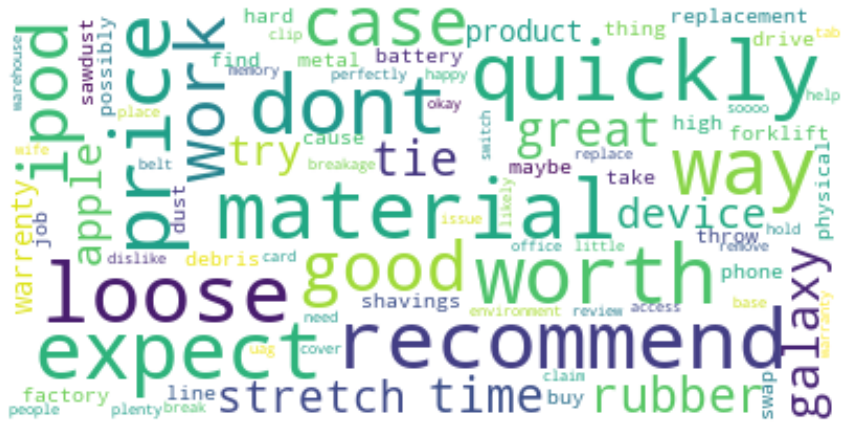

In [20]:
import matplotlib as mpl
from wordcloud import WordCloud
all_words5 = Bag_Of_Words(ListWords1)
ax = plt.figure(figsize=(15,10))
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',max_font_size=40).generate(' '.join(all_words5.keys()))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
print("word count !!!",len(all_words5))

<AxesSubplot:>

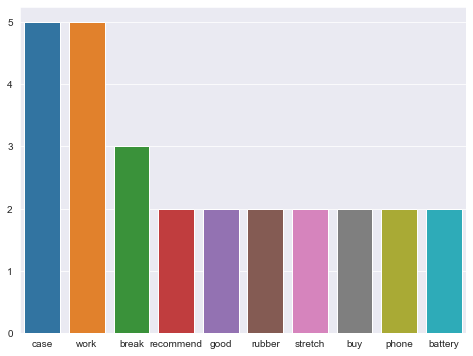

In [21]:
plt.figure(figsize = (8,6))

import seaborn as sns
from sklearn.manifold import TSNE
all_words5 = Bag_Of_Words(ListWords1)
count = []
Words  = []
for w in all_words5.most_common(10):
    count.append(w[1])
    Words.append(w[0])
sns.set_style("darkgrid")
sns.barplot(Words,count)

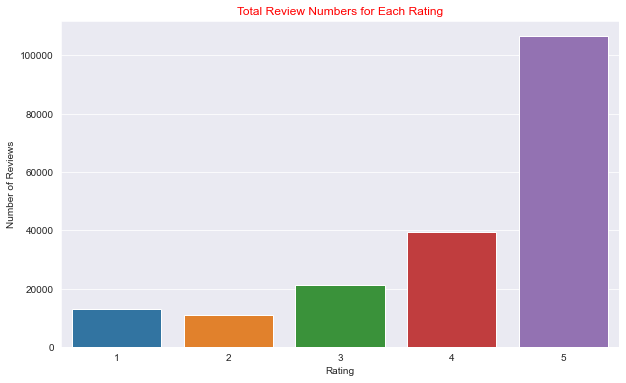

5    106594
4     39327
3     21084
1     13094
2     10897
Name: rating, dtype: int64

In [22]:
# Total numbers of ratings in the home and kitchen product reviews
plt.figure(figsize = (10,6))
sns.countplot(df['rating'])
plt.title('Total Review Numbers for Each Rating', color='r')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df['rating'].value_counts()

<AxesSubplot:ylabel='rating'>

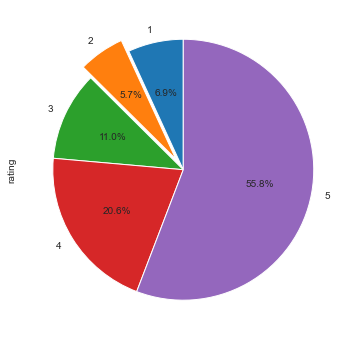

In [23]:
%matplotlib inline
plt.figure(figsize = (10,6))

df.groupby('rating').rating.count()
df.groupby('rating').rating.count().plot(kind='pie',autopct='%1.1f%%',startangle=90,explode=(0,0.1,0,0,0),)

In [24]:
#data=review_df.copy()
word_count=[]
for s1 in df.review_text:
    word_count.append(len(str(s1).split()))

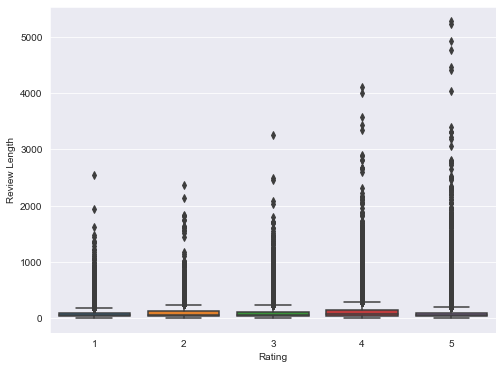

In [25]:
plt.figure(figsize = (8,6))

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="rating",y=word_count,data=df)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()

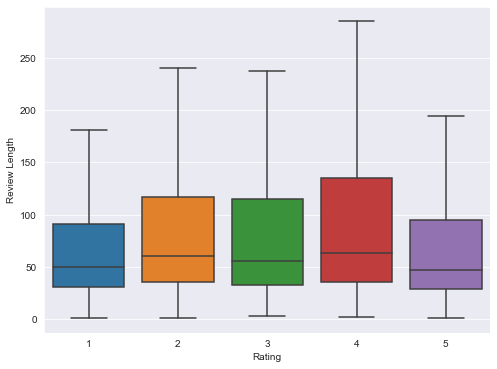

In [26]:
#Since there are outliers in the above boxplot we are not able to clearly visualize.So remove the outliers 
plt.figure(figsize = (8,6))

sns.boxplot(x="rating",y=word_count,data=df,showfliers=False)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()

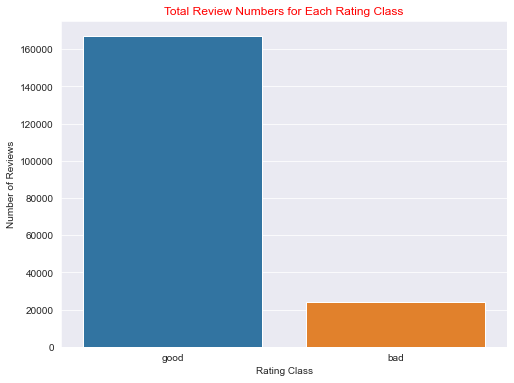

good    167005
bad      23991
Name: rating_class, dtype: int64

In [27]:
# Total numbers of ratings in the home and kitchen product reviews
plt.figure(figsize = (8,6))
sns.countplot(df['rating_class'])
plt.title('Total Review Numbers for Each Rating Class', color='r')
plt.xlabel('Rating Class')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df['rating_class'].value_counts()

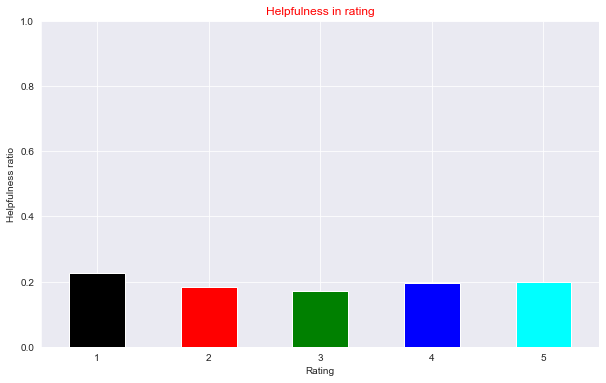

In [28]:

## DISTRIBUTION OF RATING FOR HELPFULNESS
plt.figure(figsize = (10,6))
df.groupby('rating')['help_prop'].mean().plot(kind='bar', color=['black', 'red', 'green', 'blue', 'cyan']) 
plt.title("Helpfulness in rating",color='r')
plt.xlabel("Rating")
plt.ylabel("Helpfulness ratio")
plt.ylim([0, 1])
plt.xticks(rotation=0)
plt.show()

Features

In [29]:
# Create a year column and drop time column
#df['reviewtime'] = pd.to_datetime(df['time'], format = '%Y %m %d')
# Create a "year" column and drop time column
df['review_time'] = pd.to_datetime(df['review_time'])
df['year'] = df['review_time'].dt.year
df = df.drop('review_time', axis = 1)
df.head(3)

,reviewer_id,product_id,reviewer_name,rating,unix_review_time,categories,review_text,pos_feedback,neg_feedback,rating_class,help_prop,clean_text,year
0,A30TL5EWN6DFXT,120401325X,christina,4,1400630400,['Cell Phones & Accessories'],Looks Good They look good and stick good! I ju...,0,0,good,0.0,look good look good stick good like rounded sh...,2014
1,ASY55RVNIL0UD,120401325X,emily l.,5,1389657600,['Cell Phones & Accessories'],Really great product. These stickers work like...,0,0,good,0.0,great product sticker work like review say sti...,2014
2,A2TMXE2AFO7ONB,120401325X,Erica,5,1403740800,['Cell Phones & Accessories'],LOVE LOVE LOVE These are awesome and make my p...,0,0,good,0.0,love love love awesome phone look stylish far ...,2014


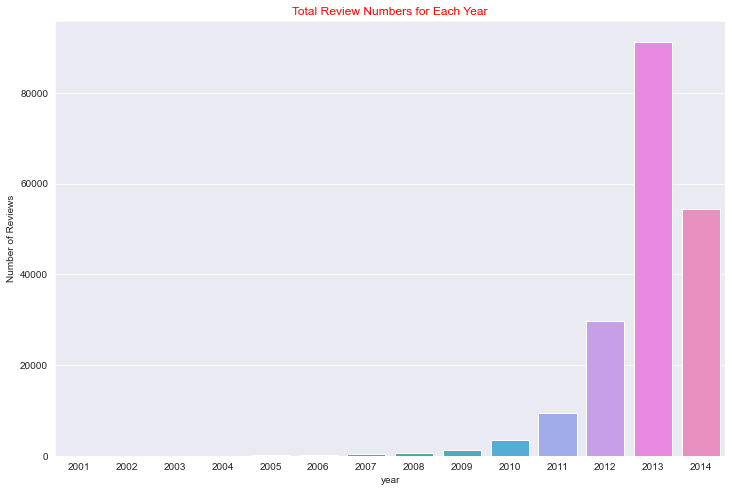

2013    91274
2014    54352
2012    29618
2011     9522
2010     3417
2009     1304
2008      676
2007      390
2006      242
2005      138
2004       57
2003        4
2001        1
2002        1
Name: year, dtype: int64

In [30]:

# Total review for every year in the cellphone product

plt.figure(figsize = (12,8))
sns.countplot(df['year'])
plt.title('Total Review Numbers for Each Year', color='r')
plt.xlabel('year')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df['year'].value_counts()

unque customers

In [31]:
# How many unique customers do we have in the dataset?
print('Number of unique customers: {}'.format(len(df['reviewer_id'].unique())))

Number of unique customers: 27874


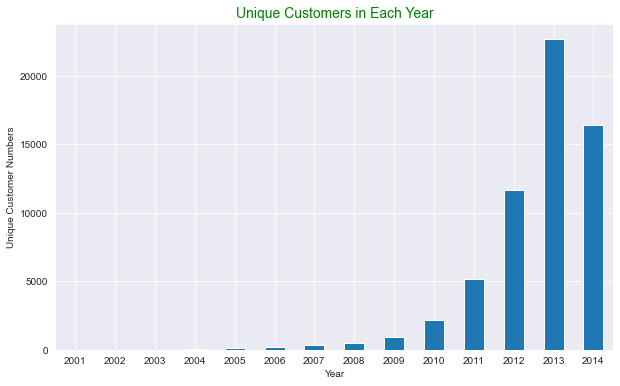

year
2001        1
2002        1
2003        2
2004       37
2005      101
2006      182
2007      318
2008      528
2009      949
2010     2205
2011     5143
2012    11667
2013    22686
2014    16436
Name: reviewer_id, dtype: int64


In [32]:
# How many unique customers in each year?
unique_cust = df.groupby('year')['reviewer_id'].nunique()

# Plot unique customer numbers in each year
plt.figure(figsize = (10,6))
# unique_cust.plot(kind='bar', rot = 0, colors = 'b')
unique_cust.plot(kind='bar', rot = 0)
plt.title('Unique Customers in Each Year', color='g', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique Customer Numbers')
plt.show()

# Print unique customer numbers in each year
print(unique_cust)

In [33]:
# unique customers for each "rating class"
a = list(df.groupby(['rating_class'])['reviewer_id'].unique())  

# number of customers
a2 = [len(a[0]),len(a[1])] 

# number of reviews for each "rating class"
b = list(df['rating_class'].value_counts())              

uniq_cust_rate = pd.DataFrame({'rating_class': ['bad', 'good'],
                               'number_of_customers': a2,
                               'number_of_reviews': sorted(b)})
print(uniq_cust_rate)

  rating_class  number_of_customers  number_of_reviews
0          bad                13927              23991
1         good                27824             167005


Product Feature

In [34]:
# Print number of unique products in the dataset
print('Number of unique products: {}'.format(len(df['product_id'].unique())))

Number of unique products: 10420


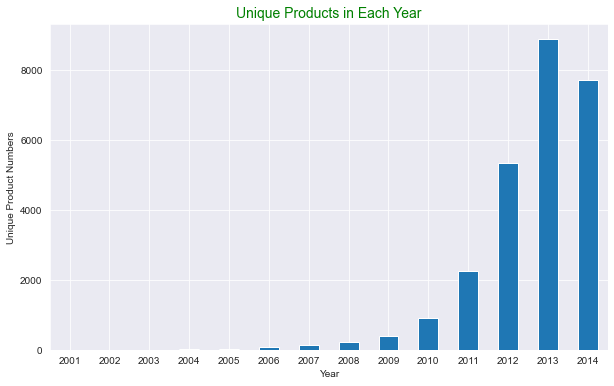

year
2001       1
2002       1
2003       1
2004      15
2005      34
2006      72
2007     128
2008     213
2009     387
2010     908
2011    2241
2012    5360
2013    8890
2014    7716
Name: product_id, dtype: int64


In [35]:
# How many unique products in each year?
unique_prod = df.groupby('year')['product_id'].nunique()

# Plot unique product numbers in each year
plt.figure(figsize = (10,6))
# unique_prod.plot(kind='bar', colors = 'b', rot =0)
unique_prod.plot(kind='bar', rot =0)
plt.title('Unique Products in Each Year', color = 'g', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique Product Numbers')
plt.show()

# Print unique product numbers in each year
print(unique_prod)

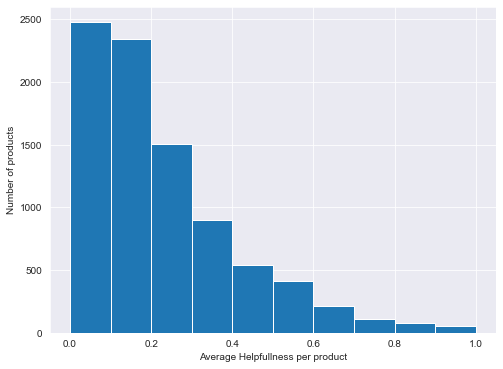

In [36]:

## DISTRIBUTION OF RATING IN PRODUCTS
 
plt.figure(figsize = (8,6))

df1 = df.copy()
df1 = df1[np.isfinite(df1['help_prop'])]
grp = df1.groupby('product_id')
counts = grp.product_id.count()        # number of reviews by each critic
means = grp.help_prop.mean()     # average freshness for each critic

means[counts > 5].hist(bins=10, edgecolor='w', lw=1)
plt.xlabel("Average Helpfullness per product")
plt.ylabel("Number of products")
plt.show()

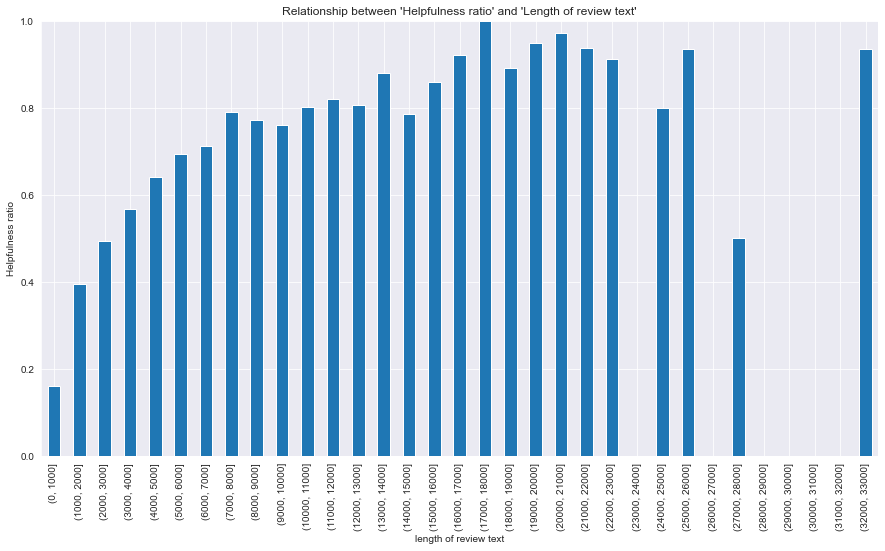

In [37]:

## HELPFULNESS FOR LENGTH OF TEXT

plt.figure(figsize = (15,8))

df1['text_len'] = df1.review_text.apply(len)
maxTextLen = max(df1.text_len)
# df1.groupby(pd.cut(df1['text_len'], np.arange(0,maxTextLen+1000,1000)))['help_prop'].mean().plot(kind='bar',colors='b')
df1.groupby(pd.cut(df1['text_len'], np.arange(0,maxTextLen+1000,1000)))['help_prop'].mean().plot(kind='bar')
plt.xlabel("length of review text")
plt.ylabel("Helpfulness ratio")
plt.title("Relationship between 'Helpfulness ratio' and 'Length of review text'")
plt.ylim([0, 1])

plt.show()

Text(0, 0.5, 'Number of Reviews')

<Figure size 1080x576 with 0 Axes>

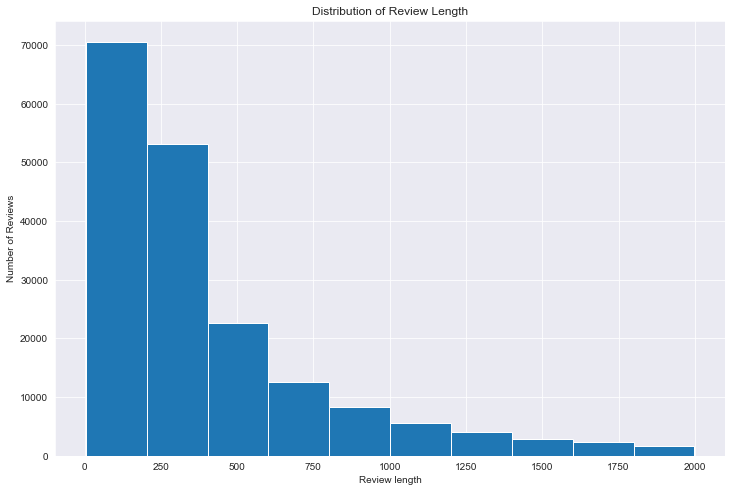

In [38]:

## PLOT DISTRIBUTION OF REVIEW LENGTH   

plt.figure(figsize = (15,8))

review_length = df["review_text"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 2000].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length')
plt.ylabel('Number of Reviews')

(0.0, 1.0)

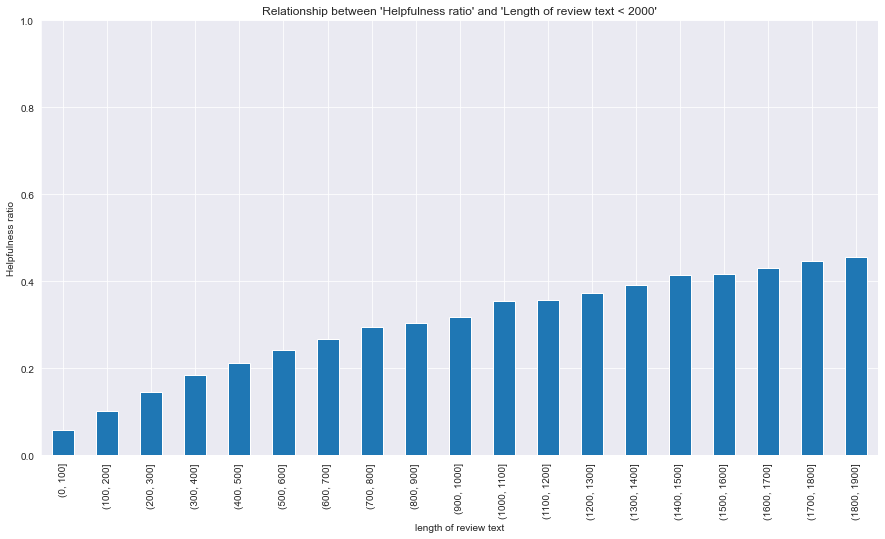

In [39]:

## check helpfulness ration below 2000 words

plt.figure(figsize = (15,8))

df1['text_len'] = df1.review_text.apply(len)
maxTextLen = 2000
# df1.groupby(pd.cut(df1['text_len'], np.arange(0,maxTextLen,100)))['help_prop'].mean().plot(kind='bar',colors='b')
df1.groupby(pd.cut(df1['text_len'], np.arange(0,maxTextLen,100)))['help_prop'].mean().plot(kind='bar')
plt.xlabel("length of review text")
plt.ylabel("Helpfulness ratio")
plt.title("Relationship between 'Helpfulness ratio' and 'Length of review text < 2000'")
plt.ylim([0, 1])

In [40]:

## LABEL HELPFULNESS

import numpy as np

def label_Helpfulness(row):
    if row['help_prop'] > 0.75:
           return 'helpful'
    else: 
           return 'unhelpful'

df1['helpIndx'] = df1.apply(label_Helpfulness, axis=1)

df1.head(2)

,reviewer_id,product_id,reviewer_name,rating,unix_review_time,categories,review_text,pos_feedback,neg_feedback,rating_class,help_prop,clean_text,year,text_len,helpIndx
0,A30TL5EWN6DFXT,120401325X,christina,4,1400630400,['Cell Phones & Accessories'],Looks Good They look good and stick good! I ju...,0,0,good,0.0,look good look good stick good like rounded sh...,2014,200,unhelpful
1,ASY55RVNIL0UD,120401325X,emily l.,5,1389657600,['Cell Phones & Accessories'],Really great product. These stickers work like...,0,0,good,0.0,great product sticker work like review say sti...,2014,182,unhelpful


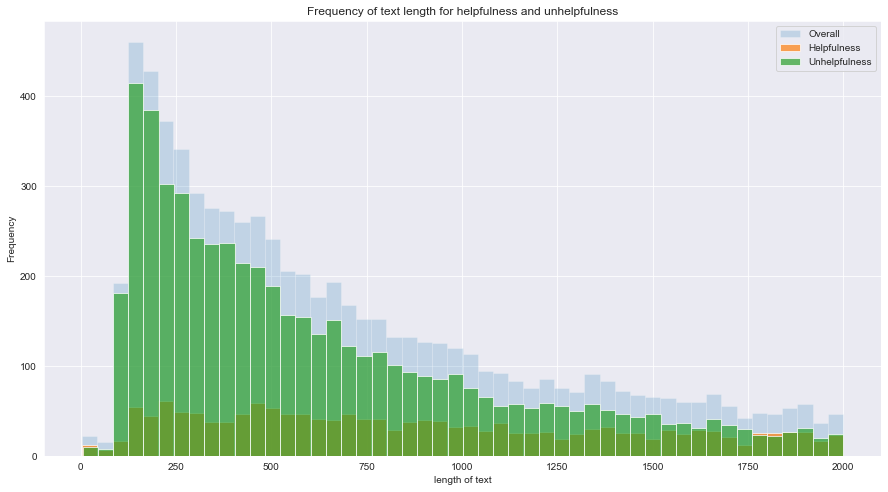

In [41]:

## Tlength of text 
 
plt.figure(figsize = (15,8))

subset_df1 = df1[(df1.neg_feedback>=2) & (df1.text_len>=2)]


# subset_df1.text_len[subset_df1.text_len<2000].plot(bins=50, kind='hist',alpha=0.2,colors='b')
subset_df1.text_len[subset_df1.text_len<2000].plot(bins=50, kind='hist',alpha=0.2)
dhelp = subset_df1.text_len[(subset_df1['helpIndx']=='helpful') & (subset_df1.text_len<2000)]
dunhelp = subset_df1.text_len[(subset_df1['helpIndx']=='unhelpful') & (subset_df1.text_len<2000)]

dhelp.plot(bins=50, kind='hist', alpha=0.7)
dunhelp.plot(bins=50, kind='hist',alpha=0.7)

plt.legend(['Overall', 'Helpfulness', 'Unhelpfulness'])
plt.xlabel("length of text")
plt.ylabel("Frequency")
plt.title("Frequency of text length for helpfulness and unhelpfulness")
plt.show()

In [42]:
# Let's see how the rating classes change for each year in a table and graph.
# Create a dataframe which shows the relationship between review numbers and rating classes for each year

df['rating_class_num'] = df['rating_class'].map({'good': 1, 'bad': 0})
    
feature = df.groupby('year').agg({'rating_class_num':['size', 'sum', 'mean']})
feature.columns = [' '.join(col).strip() for col in feature.columns.values]
feature = feature.reset_index()
feature['rating_class_num mean'] = feature['rating_class_num mean']*100
feature.columns = ['Year', 'Total Reviews', 'Relevant Rating Number', 
                       '% of Relevant Rating Number in This Year'] 
feature['% of Relevant Rating in the Total'] = (feature['Relevant Rating Number'] / 22425)*100
        
feature

,Year,Total Reviews,Relevant Rating Number,% of Relevant Rating Number in This Year,% of Relevant Rating in the Total
0,2001,1,1,100.000000,0.004459
1,2002,1,1,100.000000,0.004459
2,2003,4,4,100.000000,0.017837
3,2004,57,43,75.438596,0.191750
4,2005,138,106,76.811594,0.472687
5,2006,242,182,75.206612,0.811594
6,2007,390,336,86.153846,1.498328
7,2008,676,573,84.763314,2.555184
8,2009,1304,1070,82.055215,4.771460
9,2010,3417,2920,85.455078,13.021182


<Figure size 864x576 with 0 Axes>

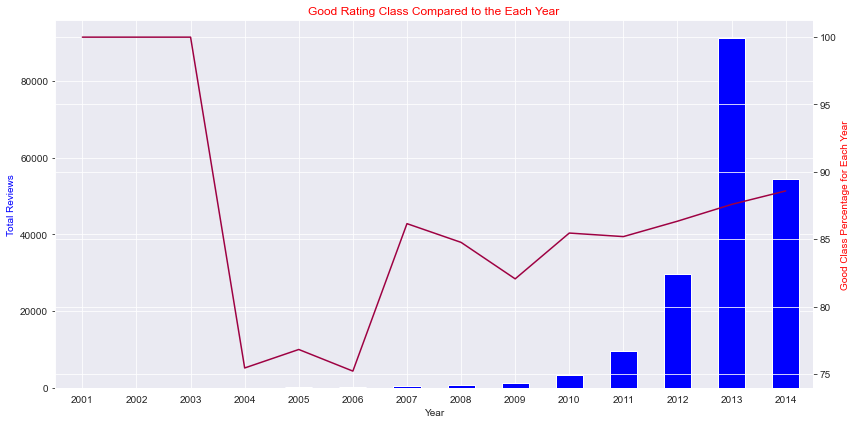

In [43]:
# Create a graph for each rating class to compare within the years


df['rating_class_num'] = df['rating_class'].map({'good': 1, 'bad': 0})

feature = df.groupby('year').agg({'rating_class_num':['size', 'sum', 'mean']})
feature.columns = [' '.join(col).strip() for col in feature.columns.values]
feature = feature.reset_index()
feature['rating_class_num mean'] = feature['rating_class_num mean']*100
feature.columns = ['Year', 'Total Reviews', 'Relevant Rating Number', 
                    '% of Relevant Rating Number in This Year'] 
plt.figure(figsize = (12,8))
fig0, ax1 = plt.subplots(figsize = (12,6))
ax2 = ax1.twinx()
feature.set_index(feature['Year'], drop=True, inplace=True)
feature["Total Reviews"].plot(kind = 'bar', stacked = True, ax = ax1, colormap = 'winter', rot=0)
feature['% of Relevant Rating Number in This Year'].plot(use_index = False, 
                                                         kind = 'line', ax = ax2, colormap='Spectral')   

plt.title('Good Rating Class Compared to the Each Year', color='r')
ax1.set_xlabel('Year')
ax1.yaxis.label.set_color('blue')
ax1.set_ylabel("Total Reviews")
ax2.set_ylabel("Good Class Percentage for Each Year")
ax2.yaxis.label.set_color('red')
plt.tight_layout()
plt.show()

In [44]:
# Function for creating a column token
def token (text):
    token = [w for w in nltk.word_tokenize(text)]
    return token

# To create token feature
df['token'] = df['review_text'].apply(token)

In [45]:
# Function for creating a column to see the length of the review text
def length(text):
    length = len([w for w in nltk.word_tokenize(text)])
    return length

# Apply length function to create review length feature
df['review_length'] = df['review_text'].apply(length)
df.head(3)

,reviewer_id,product_id,reviewer_name,rating,unix_review_time,categories,review_text,pos_feedback,neg_feedback,rating_class,help_prop,clean_text,year,rating_class_num,token,review_length
0,A30TL5EWN6DFXT,120401325X,christina,4,1400630400,['Cell Phones & Accessories'],Looks Good They look good and stick good! I ju...,0,0,good,0.0,look good look good stick good like rounded sh...,2014,1,"[Looks, Good, They, look, good, and, stick, go...",43
1,ASY55RVNIL0UD,120401325X,emily l.,5,1389657600,['Cell Phones & Accessories'],Really great product. These stickers work like...,0,0,good,0.0,great product sticker work like review say sti...,2014,1,"[Really, great, product, ., These, stickers, w...",40
2,A2TMXE2AFO7ONB,120401325X,Erica,5,1403740800,['Cell Phones & Accessories'],LOVE LOVE LOVE These are awesome and make my p...,0,0,good,0.0,love love love awesome phone look stylish far ...,2014,1,"[LOVE, LOVE, LOVE, These, are, awesome, and, m...",43


In [46]:
# Create review length bin feature
df['review_length_bin'] = pd.cut(df['review_length'], np.arange(0,4800,100))
df.head()

,reviewer_id,product_id,reviewer_name,rating,unix_review_time,categories,review_text,pos_feedback,neg_feedback,rating_class,help_prop,clean_text,year,rating_class_num,token,review_length,review_length_bin
0,A30TL5EWN6DFXT,120401325X,christina,4,1400630400,['Cell Phones & Accessories'],Looks Good They look good and stick good! I ju...,0,0,good,0.000000,look good look good stick good like rounded sh...,2014,1,"[Looks, Good, They, look, good, and, stick, go...",43,"(0, 100]"
1,ASY55RVNIL0UD,120401325X,emily l.,5,1389657600,['Cell Phones & Accessories'],Really great product. These stickers work like...,0,0,good,0.000000,great product sticker work like review say sti...,2014,1,"[Really, great, product, ., These, stickers, w...",40,"(0, 100]"
2,A2TMXE2AFO7ONB,120401325X,Erica,5,1403740800,['Cell Phones & Accessories'],LOVE LOVE LOVE These are awesome and make my p...,0,0,good,0.000000,love love love awesome phone look stylish far ...,2014,1,"[LOVE, LOVE, LOVE, These, are, awesome, and, m...",43,"(0, 100]"
3,AWJ0WZQYMYFQ4,120401325X,JM,4,1382313600,['Cell Phones & Accessories'],Cute! Item arrived in great time and was in pe...,4,0,good,1.000000,cute item arrive great time perfect condition ...,2013,1,"[Cute, !, Item, arrived, in, great, time, and,...",60,"(0, 100]"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,5,1359849600,['Cell Phones & Accessories'],leopard home button sticker for iphone 4s awes...,2,1,good,0.666667,leopard home button sticker iphone awesome sta...,2013,1,"[leopard, home, button, sticker, for, iphone, ...",36,"(0, 100]"


In [47]:
# Good rating percentages for each length bin with 50's
per_pos_length = df.groupby(['review_length_bin'])['rating_class_num'].mean()
df['review_length_bin'] = df.review_length_bin.astype(str)
per_pos_length = per_pos_length*100
per_pos_length

review_length_bin
(0, 100]         87.344249
(100, 200]       86.724872
(200, 300]       87.908031
(300, 400]       88.979948
(400, 500]       89.870836
(500, 600]       90.709046
(600, 700]       89.009793
(700, 800]       91.013072
(800, 900]       86.756757
(900, 1000]      92.181070
(1000, 1100]     90.857143
(1100, 1200]     93.006993
(1200, 1300]     94.230769
(1300, 1400]     97.183099
(1400, 1500]     92.307692
(1500, 1600]     97.368421
(1600, 1700]    100.000000
(1700, 1800]     83.870968
(1800, 1900]     81.250000
(1900, 2000]     93.750000
(2000, 2100]     82.352941
(2100, 2200]     81.818182
(2200, 2300]    100.000000
(2300, 2400]     90.000000
(2400, 2500]    100.000000
(2500, 2600]    100.000000
(2600, 2700]     85.714286
(2700, 2800]    100.000000
(2800, 2900]    100.000000
(2900, 3000]    100.000000
(3000, 3100]    100.000000
(3100, 3200]     88.888889
(3200, 3300]    100.000000
(3300, 3400]    100.000000
(3400, 3500]    100.000000
(3500, 3600]           NaN
(3600, 370

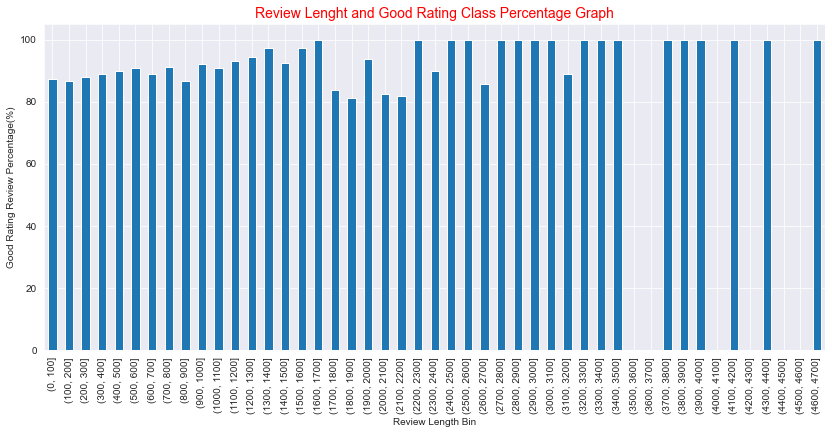

In [48]:
# Plot the graph for good rating class percentage and review length bin
plt.figure(figsize = (14,6))
per_pos_length.plot(kind='bar')
plt.title('Review Lenght and Good Rating Class Percentage Graph', color = 'r', size = 14)
plt.xlabel('Review Length Bin')
plt.ylabel('Good Rating Review Percentage(%)')
plt.show()

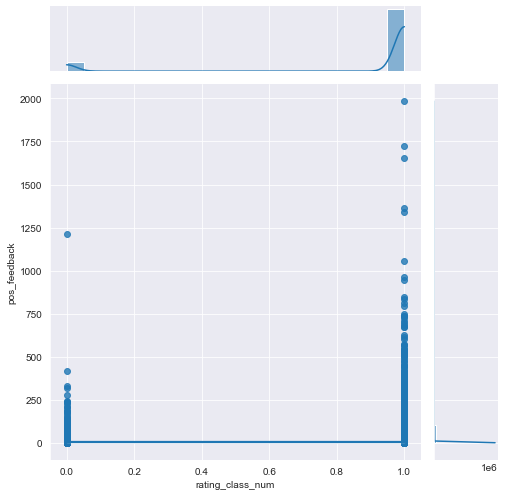

In [49]:
# Correlation between rating_class_num and positive feedback 
sns.jointplot(x ='rating_class_num', y = 'pos_feedback', data = df, kind = 'reg', size = 7)

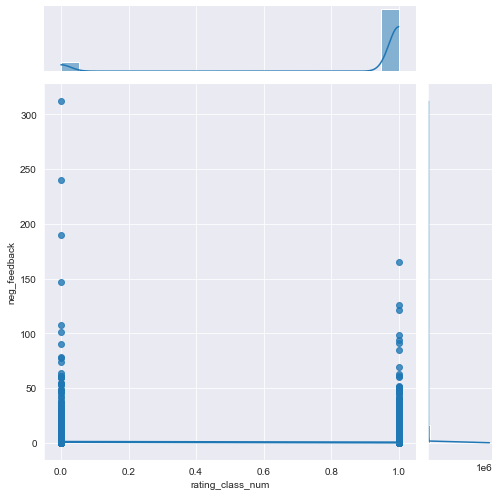

In [50]:
# Correlation between rating_class_num and negative feedback 
sns.jointplot(x ='rating_class_num', y = 'neg_feedback', data = df, kind = 'reg', size = 7)

<AxesSubplot:>

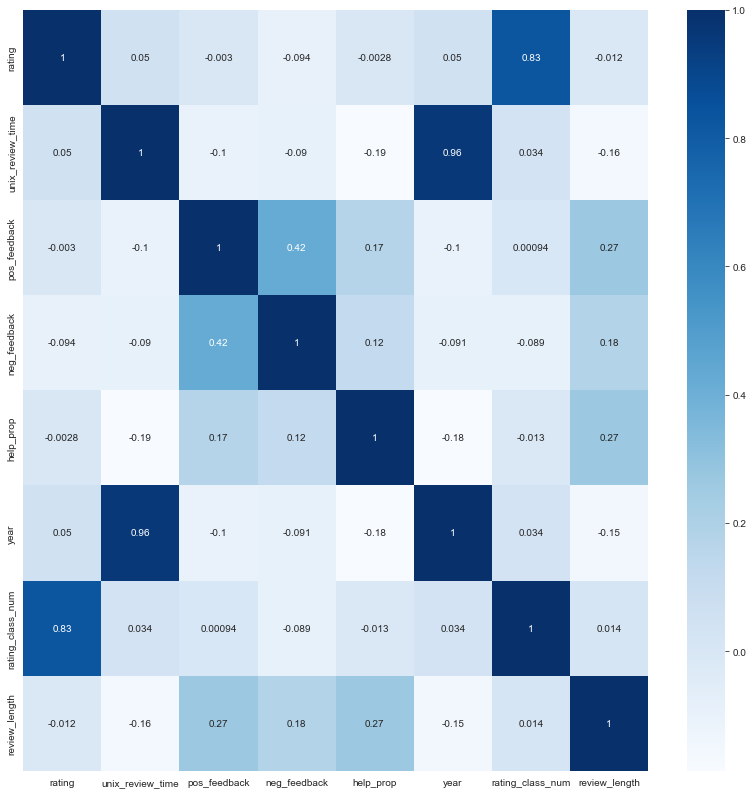

In [51]:
# Plotting correlation matrix between numeric variables

plt.figure(figsize = (14,14))
sns.heatmap(df.corr(method="pearson"), cmap='Blues', annot = True)

In [52]:
df3 = df.drop(df[(df['review_length'] > 150) & (df['rating_class'] == 'good')].index)

In [53]:
df4 = df3.drop(df3[(df3['year'] < 2010)].index)
df4=df4.head(15000)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 20422
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reviewer_id        15000 non-null  object 
 1   product_id         15000 non-null  object 
 2   reviewer_name      15000 non-null  object 
 3   rating             15000 non-null  int64  
 4   unix_review_time   15000 non-null  int64  
 5   categories         15000 non-null  object 
 6   review_text        15000 non-null  object 
 7   pos_feedback       15000 non-null  int64  
 8   neg_feedback       15000 non-null  int64  
 9   rating_class       15000 non-null  object 
 10  help_prop          15000 non-null  float64
 11  clean_text         15000 non-null  object 
 12  year               15000 non-null  int64  
 13  rating_class_num   15000 non-null  int64  
 14  token              15000 non-null  object 
 15  review_length      15000 non-null  int64  
 16  review_length_bin  150

In [54]:
df['review_length'].describe()

count    190996.000000
mean        109.358693
std         157.524429
min           1.000000
25%          35.000000
50%          59.000000
75%         120.000000
max        6511.000000
Name: review_length, dtype: float64

In [55]:
# Create a new data frame with clean text and rating class number
df5 = df4[["review_text", "rating_class_num"]].reset_index()
df5.head(10)

,index,review_text,rating_class_num
0,0,Looks Good They look good and stick good! I ju...,1
1,1,Really great product. These stickers work like...,1
2,2,LOVE LOVE LOVE These are awesome and make my p...,1
3,3,Cute! Item arrived in great time and was in pe...,1
4,4,leopard home button sticker for iphone 4s awes...,1
5,5,Cute These make using the home button easy. My...,1
6,6,best thing ever.. Came just as described.. It ...,1
7,7,not a good Idea it worked for the first week t...,0
8,8,"Solid Case Good case, solid build. Protects ph...",1
9,9,Perfect Case This is a fantastic case. Very st...,1


In [56]:
# Initialize the countervectorizer
countVec = CountVectorizer(ngram_range=(1, 2),binary=True)


In [57]:
# Fit the 'clean_text' to countvectorizer
countVec.fit(df5["review_text"])

CountVectorizer(binary=True, ngram_range=(1, 2))

In [58]:
# Transform the matriz
transformed_matrix = countVec.transform(df5["review_text"])


In [59]:
transformed_matrix

<15000x231071 sparse matrix of type '<class 'numpy.int64'>'
	with 1375459 stored elements in Compressed Sparse Row format>

In [60]:
# Convert matrix to array
#csr_sparse_matrix = transformed_matrix.tocsr()

# Convert the compressed sparse row matrix to an array without memory issues
#array = csr_sparse_matrix.toarray()
#transformed_matrix.toarray()

In [61]:
# Extracting the feature names
names = countVec.get_feature_names()

In [62]:
df5.head

<bound method NDFrame.head of        index                                        review_text  \
0          0  Looks Good They look good and stick good! I ju...   
1          1  Really great product. These stickers work like...   
2          2  LOVE LOVE LOVE These are awesome and make my p...   
3          3  Cute! Item arrived in great time and was in pe...   
4          4  leopard home button sticker for iphone 4s awes...   
...      ...                                                ...   
14995  20418  Ugh i accidentally bought this for my brother ...   
14996  20419             Four Stars Item as described. Works...   
14997  20420  no I do not reccomend this. It stopped working...   
14998  20421  Works great! This works just as advertised and...   
14999  20422  A great purchase... The extra length does wond...   

       rating_class_num  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
...      

In [63]:
# Adding a 'rating' column from previous dataframe's rating value
#df6 = pd.DataFrame(transformed_matrix.toarray(), columns=names)
df5['rating'] = df5['rating_class_num']

In [64]:
df5['rating'].head()

0    1
1    1
2    1
3    1
4    1
Name: rating, dtype: int64

In [65]:
# Create lists for forming a dataframe summary
feature_names = []
avg_ratings = [] 
rating_counts = []
for name in names:
    if name != 'rating':    
        avg_rating = df[df[name]== 1]['rating'].mean()
        rating_count = df[df[name]== 1]['rating'].count()
        feature_names.append(name)
        avg_ratings.append(avg_rating)
        rating_counts.append(rating_count)  
    else:
        pass

KeyError: '00'

In [ ]:
##### Create a new dataframe from words, average ratings, and rating counts
df_summary = pd.DataFrame({'feature_name':feature_names, 'avg_rating': avg_ratings, 'rating_count':rating_counts})

In [ ]:
# Let's see the new dataframe
df_summary

In [ ]:
# Words that are commonly used in the reviews which have good ratings
df_good = df_summary.query("rating_count > 20").sort_values(by='avg_rating', ascending=False)[4:50]
df_good.head(50)

In [ ]:
wc_good = dict(zip(df_good['feature_name'].tolist(), df_good['avg_rating'].tolist()))

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(wc_good)
 
# plot the WordCloud image                       
plt.figure(figsize = (20, 20), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
# Words that are commonly used in the reviews which have bad ratings
df_bad = df_summary.query("rating_count > 10").sort_values(by= 'avg_rating', ascending=True)[:12]

In [ ]:
df_bad.sort_values(by=['avg_rating'],ascending=False,inplace=True)
df_bad

In [ ]:
wc_bad = dict(zip(df_bad['feature_name'].tolist(), df_bad['avg_rating'].tolist()))

In [ ]:
# Generate a word cloud image

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(wc_bad)
 
# plot the WordCloud image                       
plt.figure(figsize = (20, 20), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
df.info()

In [ ]:
df4.to_csv('/users/desktop/Reduced_Cleaned_Reviews.csv', sep=',', encoding='utf-8', index = False)
